In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import numpy as np


## **Scrape booking.com data and store in csv file**

In [2]:
csv_file = open('Hotels_booking.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Hotel_Name","Hotel_Rating","Hotel_Address","Disitance_to_CityCenter","AVG_Price","Review_Score","Description","Photo_Links"])


for i in range (2):
    
    # website page (loop 2 times)
    url = f'https://www.booking.com/searchresults.html?ss=Venice%2C+Veneto%2C+Italy&ssne=Milan&ssne_untouched=Milan&label=gen173nr-1FCAEoggI46AdIM1gEaEiIAQGYATG4AQfIAQzYAQHoAQH4AQKIAgGoAgO4AvzgpZkGwAIB0gIkZjZhNzQzMzAtYjczOS00MTMwLTljNjgtZDE5Y2ViNTAxYTBi2AIF4AIB&sid=d335f1a46c97b0ac9153c538693ec2e2&aid=304142&lang=en-us&sb=1&src_elem=sb&src=searchresults&dest_id=-132007&dest_type=city&ac_position=0&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=f3a537017981024d&checkin=2022-12-23&checkout=2022-12-25&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset={i*25}'
    
    # headers
    booking_headers = {
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"}
    
    # create source, content and soup
    source = requests.get(url,headers=booking_headers)
    content = source.content.decode("utf8")
    soup = BeautifulSoup(content,"lxml")
    
    # get results of one page 25 hotels
    results = soup.find_all("div",{"class":"b978843432"})
    
    for result in results:
        # find hotel name
        try:
            hotel_name=result.find("div", class_="fcab3ed991 a23c043802").text
        except:
            hotel_name="n\a"

        # Find rating
        try:
            hotel_rating=len(result.find_all("span",{"class":"b6dc9a9e69 adc357e4f1 fe621d6382"}))
        except:
            hotel_rating="n\a"


        # find Disitance_to_CityCenter
        try:
            Disitance_to_CityCenter=result.find("span",{"data-testid":"distance"}).text
        except:
            Disitance_to_CityCenter="n\a"

        # find hotel price
        try:
            hotel_price=result.find("span",class_="fcab3ed991 bd73d13072").text
        except:
            hotel_price="n\a"


        # find review score
        try:
            hotel_review_score=result.find("div", class_="b5cd09854e d10a6220b4").text
        except:
            hotel_review_score="n\a"

        # find address & description in the next page(in specific hotel page)

        ## find the specific hotel page link and create another soup object.
        hotel_url = result.find("h3",class_="a4225678b2").a.get("href")
        hotel_headers = {
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"}

        hotel_source = requests.get(hotel_url,headers=hotel_headers)
        hotel_content = hotel_source.content.decode("utf8")
        hotel_soup = BeautifulSoup(hotel_content,"lxml")

        # find address
        try:
            hotel_address = hotel_soup.find("span",class_="hp_address_subtitle js-hp_address_subtitle jq_tooltip").text.strip()
        except:
             hotel_address ="n\a"

        # find description
        try:
            hotel_description=hotel_soup.find("div",id="property_description_content").text.strip().replace("\n"," ")
        except:
            hotel_description="n\a"

        # photo link
        results_2 = hotel_soup.find("div",{"class":"nha_large_photo_main_content nha_large_photo_extra_height hp_gallery_buttons_redesign hp_gallery_buttons_redesign_var2"}).find_all("a")
        photo_link = []
        for result in results_2[1:7]:
            try:
                photo_link.append(result.img.get("src"))
            except:
                photo_link.append("n\a")
                
                
        csv_writer.writerow([hotel_name,hotel_rating, hotel_address, Disitance_to_CityCenter, hotel_price,hotel_review_score,hotel_description,photo_link])

csv_file.close()



In [3]:
booking=pd.read_csv("Hotels_booking.csv")
booking.head()

,Hotel_Name,Hotel_Rating,Hotel_Address,Disitance_to_CityCenter,AVG_Price,Review_Score,Description,Photo_Links
0,Hotel Bonvecchiati,4,"Calle Goldoni 4488, San Marco, 30124 Venice, I...",250 m from center,€ 410,8.4,You're eligible for a Genius discount at Hotel...,['https://cf.bstatic.com/xdata/images/hotel/ma...
1,Carnival Palace - Venice Collection,4,"Fondamenta di Cannaregio 929, Cannaregio, 3012...",2 km from center,€ 361,9.1,You're eligible for a Genius discount at Carni...,['https://cf.bstatic.com/xdata/images/hotel/ma...
2,Ca' San Polo,4,"Sestiere San Polo 2696, San Polo, 30125 Venice...",0.9 km from center,€ 365,8.3,You're eligible for a Genius discount at Ca' S...,['https://cf.bstatic.com/xdata/images/hotel/ma...
3,G & T Apartments,3,"Dorsoduro 785, Dorsoduro, 30123 Venice, Italy",1 km from center,€ 264,8.0,"Set in the Dorsoduro area of Venice, G & T Apa...",['https://t-cf.bstatic.com/xdata/images/hotel/...
4,Palazzo San Luca,4,"San Marco 4065, San Marco, 30135 Venice, Italy",400 m from center,€ 390,8.5,You're eligible for a Genius discount at Palaz...,['https://t-cf.bstatic.com/xdata/images/hotel/...


In [4]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel_Name               50 non-null     object 
 1   Hotel_Rating             50 non-null     int64  
 2   Hotel_Address            50 non-null     object 
 3   Disitance_to_CityCenter  50 non-null     object 
 4   AVG_Price                50 non-null     object 
 5   Review_Score             50 non-null     float64
 6   Description              50 non-null     object 
 7   Photo_Links              50 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.2+ KB


## **Scrape expedia.com data and store in csv file**



<!DOCTYPE html>
<html data-language="en_GB" dir="ltr" lang="en">
<head><title></title><meta name="robots" content="noindex,nofollow"/><link rel="preconnect" href="https://maps.googleapis.com/"/><meta charSet="UTF-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="viewport" content="width=device-width, initial-scale=1.0"/><meta name="apple-mobile-web-app-capable" content="yes"/><meta name="mobile-web-app-capable" content="yes"/><meta name="theme-color" content="#000000"/><link type="image/x-icon" href="/favicon.ico" sizes="16x16 32x32" rel="shortcut icon"/><link type="image/x-icon" href="/favicon.ico" sizes="16x16 32x32" rel="icon"/><link rel="apple-touch-icon" href="/favicon.ico"/><link rel="preload" href="https://c.travel-assets.com/shopping-pwa/l10nBundle/en_GB.938024a1aa85ec9ce1e9.js" as="script"/><link rel="preload" href="https://c.travel-assets.com/shopping-pwa/app.0574e99510ff8e623550.js" as="script"/><link rel="preload" href="https://c.travel-assets.c
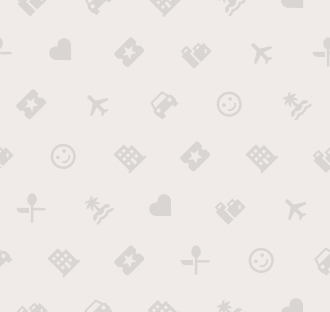
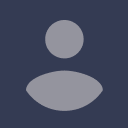

In [10]:

headers = {
    "authority": "www.expedia.fi",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "accept-language": "en,zh-CN;q=0.9,zh;q=0.8,fi;q=0.7,sv;q=0.6,en-US;q=0.5",
    "referer": "https://www.expedia.fi/en/?currency=EUR&langid=2057&siteid=73",
    "sec-ch-ua": "\"Google Chrome\";v=\"107\", \"Chromium\";v=\"107\", \"Not=A?Brand\";v=\"24\"",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "\"macOS\"",
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "same-origin",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
}
cookies = {
    "linfo": "v.4,|0|0|255|1|0||||||||2057|0|0||0|0|0|-1|-1",
    "CRQS": "t|73`s|73`l|en_GB`c|EUR",
    "currency": "EUR",
    "MC1": "GUID=31bdeda400ac4319b93868ff0d1cd27f",
    "DUAID": "31bdeda4-00ac-4319-b938-68ff0d1cd27f",
    "xdid": "c7725473-73eb-4083-bfd0-85ea95385042|1663829729|expedia.fi",
    "OIP": "gdpr|0",
    "osano_consentmanager_uuid": "5b7d9289-2bba-4cfe-ad91-917aa1caea9b",
    "osano_consentmanager": "7fXGxliECCx9Ns-WZOXPp6AwH5MONvGqBhzHAqGkh_5DwRHvxIKoWuIM9HRx4JPPv1moSyIgwewQshS8HyHogn4_Z89WDLalVbwwMkpjGSfHtyf78QlLoDyIWCRM0HLsCc76UPEZ7cfDMHKkU_QJ2lnBu1PXWJhHMjaLVeYg39WNHhnHrRRDTty9tcA-3JU3hbL98BRAC0uDRJh6_wuEAOP4ltS-YbzdkNcZTuKufwCheRHirj73vO2J9xArYHsuQMKfkDxkKmVIRZNQJ7sCVVXXo40=",
    "CRQSS": "e|0",
    "iEAPID": "0",
    "tpid": "v.1,73",
    "HMS": "4a3d1f65-69df-441d-9f0a-7c908cc83803",
    "_abck": "7F9F3D2E51544CC641845FCAEAC0780B~0~YAAQmVsDF86+zDuEAQAAp4exYAgxKYBtBqO9VmOHXaBdynm+4Bh5GfTNpddB2A6HCvJRQ/3G1Arp060osAX9IlpGCxEuMUArcKtToAAeKlAvyIAfkO8gfuh8FfnHNqCSjOeH6UxvBSCRhK8NFzOcUJLj2aCDVTC+44JVgBQd2glSaORKeHkVSm250bOyma9v/8VVlLRFyHFjGmPNCAk7nccZgwwVc/inuCBI1ulmOGw0lvei+i42GovKOsz4s4dQfjhupUi9ERJsp4hXUNTGft2CMzAuT7oa7xkpGhpTtVtJjb3+GalW/4eoWwoJmo3oyT916TerEOEpo5le21uc6oVyPsasgiPNSwdolbxpUjyGbRrH6913cKEF38WXG1wEArmVwNhWfQyj51tFdSRovIHXRmJp~-1~-1~-1",
    "bm_sz": "904C3CCE49A16011C9A0D339D475DB0A~YAAQmVsDF9C+zDuEAQAAp4exYBE0uFJCXD3srlN1s0gXZTKPAur7pDu4mUNetKOvRIMakeVQCSIoR82MYONpbof20np5sjiIc254LfTM0Y/4kFS2A9iujajHa9ue/h1Hc24HnGjyir2mu1aW8C7h+FJGmuxVwIsz68n4tlf1GxskE9115rttccoRnViFFopE72qoZxkg2ocjwTjx3wa5g9ikpwKp+MP5yF5wYWYDfcSiliKSKt4Dd6SFFPWu/6g9uYJFnkMZw0xDTdRDW2C9TxlY6av2zJwq0T1B34gUUD6+oXI=~4536630~3420209",
    "bm_mi": "40FCB99E5A09B736DA9F70EC11D4874C~YAAQmVsDF+O+zDuEAQAAaI6xYBGw7ucyOt2eHzWGNnZe/OpKAXgLIiUHROI78cC6DPo4KdHTmWrGa8B89PbxuntsIWbhd7PuVTKoUrGKZc6+k4bpEOvD/ByTplIo2+I9eA2hCEka0CKic1WumVYnDkss3KsNn7b+Ux5omTh0srExwIm3AaP7ENJxt7f45m1MKWbMAfjZ7C+vWAghykJKm3zPXhF+kMApGo9+RW8GWZie4H+29cuCl2wjiSVcWSdsjsFWoDRb5fgYpP+W6+FOwcNFrWj9BQCOIvaBNWU5qrFKHlBebCqM+eT2tnD2~1",
    "s_ppv": "%5B%5BB%5D%5D",
    "s_ips": "1",
    "AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg": "1",
    "qualtrics_sample": "true",
    "qualtrics_SI_sample": "true",
    "ak_bmsc": "133B30B8558C10D04BEBA29B0239C4A1~000000000000000000000000000000~YAAQmVsDF/u+zDuEAQAAsJaxYBGjGr0fKsXciuOTVfSLQRFm1J05lYzRkdxNjOX0subn4eVmUFez8+jNBT71uo9gfgTwMVGVz+iTAJbK+0A7cdKO27sOS4vu0jKkIfKODQRLoE+mXjuKY9oV2jDWFakGn82EpkGp+wk6syqofy4EFh52CQcOS3f94ugkjgJ++OjFjirAVvX4vn2IclKe1qI+ajwkCICcB68rKijVJ1Nxj1VxHeZJhwVAbL72iqEXruJPfdQISUolzfKuQh4vnFOiOehj981fRbVGE0Ie4bGO8/fLiRpJROiTQ1MeNjXtkxTvlpBSuPAD5xeNhVbv+NcwDv/5QN4Crsyw2GY5wP+jlFSV8LCXyC1WpX9ciVlNYswToWMcC2KEKpuzUw/nCu4U737XrE6Fi4E6DEGh",
    "s_cc": "true",
    "_cls_v": "a0b35199-8fa8-48fe-9d32-6493367c254f",
    "_cls_s": "1c35feeb-cf3a-4ccf-aea5-1b084cbebad6:0",
    "AMCV_C00802BE5330A8350A490D4C%40AdobeOrg": "1585540135%7CMCIDTS%7C19307%7CMCMID%7C60926917596303044003327981066515693684%7CMCAAMLH-1668674373%7C6%7CMCAAMB-1668674373%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1668076773s%7CNONE%7CMCAID%7CNONE%7CvVersion%7C4.4.0%7CMCCIDH%7C-2034012538",
    "session_id": "4a3d1f65-69df-441d-9f0a-7c908cc83803",
    "page_name": "page.Hotel-Search",
    "JSESSIONID": "695ED7D99D64DE8E8AD4C50A0501A947",
    "s_ppn": "Homepage",
    "CONSENTMGR": "ts:1668069973341%7Cconsent:false",
    "utag_main": "v_id:018460b19623004ec3173560224805075003d06d0093c$_sn:1$_se:3$_ss:0$_st:1668071773362$ses_id:1668069561893%3Bexp-session$_pn:3%3Bexp-session",
    "s_tp": "3045",
    "cesc": "%7B%22marketingClick%22%3A%5B%22false%22%2C1668069976558%5D%2C%22hitNumber%22%3A%5B%229%22%2C1668069976558%5D%2C%22visitNumber%22%3A%5B%225%22%2C1668069559888%5D%2C%22cidVisit%22%3A%5B%22Brand.DTI%22%2C1668069976558%5D%2C%22entryPage%22%3A%5B%22Homepage%22%2C1668069976558%5D%2C%22cid%22%3A%5B%22Brand.DTI%22%2C1668069590261%5D%7D",
    "bm_sv": "67EE88D244B95E12300A1B0B4050666F~YAAQmVsDF6nPzDuEAQAAYUa4YBE+cCpdSTOLBHst7s7Lmj11bHQXaO/pIBk080waiqQpdF+NR6ihjxUQcVXTHl0T6NuNATP7MPMmD1aXeuMBS0cJG2DFfzvCcMwF3iCIc3pr/cDtWlAjbji7SDtYhgjkURU/5gLvCHZEl0cKkDqEdPEznv/A5gpd0AtJUYx0ExamKA5ZAKFWGxygVjFA/qmdoxHNqCpRe7I+f49TMEZiqWBierGbnwisGKBVlm19zw==~1"
}
url = "https://www.expedia.fi/Hotel-Search"
params = {
    "destination": "Venice",
    "startDate": "2022-12-23",
    "endDate": "2022-12-25",
    "d1": "2022-12-23",
    "d2": "2022-12-25",
    "rooms": "1",
    "adults": "2",
    "regionId": "179981",
    "latLong": "45.434031,12.338332"
}
response = requests.get(url, headers=headers, cookies=cookies, params=params)

print(response.text)
print(response)

In [26]:
content = response.content.decode("utf8")
soup = BeautifulSoup(content,"lxml")
results = soup.find_all("div",{"class":"uitk-card uitk-card-roundcorner-all uitk-card-has-primary-theme"})
print (len(results))


18


In [29]:

csv_file = open('Hotels_expedia.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Hotel_Name","Hotel_Rating","Hotel_Address","Disitance_to_CityCenter","AVG_Price","Review_Score","Description","Photo_Links"])




for result in results:
    # find hotel name
    try:
        hotel_name=result.find("h2", class_="uitk-heading uitk-heading-5 overflow-wrap").text
    except:
        hotel_name="n\a"
        
    # find hotel price
    try:
        hotel_price=result.find("div",class_="uitk-text uitk-type-600 uitk-type-bold uitk-text-emphasis-theme").text
    except:
        hotel_price="n\a"
        
    # find review score
    try:
        hotel_review_score=result.find("span",{"class":"uitk-text uitk-type-300 uitk-type-bold uitk-text-default-theme"}).text
    except:
        hotel_review_score="n\a"
        
        
    # specific hotel page   
    root = "https://www.expedia.fi/en"

    hotel_url = root+result.find("a",{"data-stid":"open-hotel-information"})["href"]
    hotel_headers = {
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"}


    hotel_source = requests.get(hotel_url,headers=hotel_headers)
    hotel_content = hotel_source.content.decode("utf8")
    hotel_soup = BeautifulSoup(hotel_content,"lxml")


        
    # Find rating
    try:
        hotel_rating=hotel_soup.find("div",{"class":"uitk-rating"}).span.text
    except:
        hotel_rating="n\a"
        
    
    # find Disitance_to_CityCenter
    try:
        Disitance_to_CityCenter=hotel_soup.find("span",{"class":"uitk-layout-flex-item uitk-layout-flex-item-flex-shrink-0"}).text
    except:
        Disitance_to_CityCenter="n\a"
    
        
    
    # find address
    try:
        hotel_address = hotel_soup.find("div",{"class":"uitk-text uitk-type-300 uitk-text-default-theme uitk-layout-flex-item uitk-layout-flex-item-flex-basis-full_width"}).text
    except:
        hotel_address ="n\a"
        
    # find description
    try:
        hotel_description="n\a"
    except:
        hotel_description="n\a"
    
    # photo link
    photo_result = hotel_soup.find_all("div",{"class":"uitk-image-placeholder uitk-image-placeholder-image"})
    
    photo_link=[]
    for result in photo_result:
        photo_link.append(result.img.get("src"))

    
    
    csv_writer.writerow([hotel_name,hotel_rating, hotel_address, Disitance_to_CityCenter, hotel_price,hotel_review_score,hotel_description,photo_link])

csv_file.close()




In [30]:
expedia = pd.read_csv("Hotels_expedia.csv")
expedia.head()

,Hotel_Name,Hotel_Rating,Hotel_Address,Disitance_to_CityCenter,AVG_Price,Review_Score,Description,Photo_Links
0,Small Luxury Hotel Ca' di Dio,5.0 star property,"Riva de la Ca' di Dio 2182, Sestiere Castello,...",11 min walk,€998,4.9,n,['https://images.trvl-media.com/hotels/6000000...
1,Hotel Antiche Figure,3.0 star property,"Santa Croce 687, Fondamenta S. Simeon Piccolo,...",2 min walk,€342,4.8,n,['https://images.trvl-media.com/hotels/1000000...
2,Unahotels Ala Venezia - Adults Only,3.5 star property,"San Marco 2494, Campo Santa Maria Del Giglio, ...",1 min walk,€276,4.4,n,['https://images.trvl-media.com/hotels/1000000...
3,Hotel Montecarlo,3.0 star property,"Calle Specchieri 463 San Marco, Venice, VE, 30124",1 min walk,€251,4.6,n,['https://images.trvl-media.com/hotels/1000000...
4,Hotel Cavalletto e Doge Orseolo,4.0 star property,"Piazza San Marco 1107, Calle del Cavalletto, V...",1 min walk,€265,4.2,n,['https://images.trvl-media.com/hotels/1000000...


In [31]:
expedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel_Name               18 non-null     object 
 1   Hotel_Rating             18 non-null     object 
 2   Hotel_Address            18 non-null     object 
 3   Disitance_to_CityCenter  18 non-null     object 
 4   AVG_Price                18 non-null     object 
 5   Review_Score             18 non-null     float64
 6   Description              18 non-null     object 
 7   Photo_Links              18 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.2+ KB


### **Scrape hotels.com data and store in csv file**

In [32]:
url="https://fi.hotels.com/Hotel-Search?adults=2&d1=2022-12-23&d2=2022-12-25&destination=Venetsia%2C%20Veneto%2C%20Italia&endDate=2022-12-25&latLong=45.434031%2C12.338332&regionId=3687&selected=&semdtl=&sort=RECOMMENDED&startDate=2022-12-23&theme=&useRewards=false&userIntent="
headers = {
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"}

source = requests.get(url,headers=headers)
content = source.content.decode("utf8")

soup = BeautifulSoup(content,"lxml")


results = soup.find_all("li",{"class":"uitk-spacing uitk-spacing-margin-blockstart-three"})

len (results)



csv_file = open('Hotels_hotels.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Hotel_Name","Hotel_Rating","Hotel_Address","Disitance_to_CityCenter","AVG_Price","Review_Score","Description","Photo_Links"])




for result in results:
    # find hotel name
    try:
        hotel_name=result.find("h3", class_="uitk-heading uitk-heading-6 is-visually-hidden").text
    except:
        hotel_name="n\a"
        
    # find hotel price
    try:
        hotel_price=result.find("div",class_="uitk-text uitk-type-600 uitk-type-bold uitk-text-emphasis-theme").text
    except:
        hotel_price="n\a"
        
    # find review score
    try:
        hotel_review_score=result.find ("span",{"class":"uitk-text uitk-type-300 uitk-type-bold uitk-text-default-theme"}).text
    except:
        hotel_review_score="n\a"
        
        
    # specific hotel page   
    root = "https://fi.hotels.com"

    hotel_url = root+result.find("a",{"data-stid":"open-hotel-information"})["href"]
    hotel_headers = {
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36"}


    hotel_source = requests.get(hotel_url,headers=hotel_headers)
    hotel_content = hotel_source.content.decode("utf8")
    hotel_soup = BeautifulSoup(hotel_content,"lxml")


        
    # Find rating
    try:
        hotel_rating=hotel_soup.find("div",{"class":"uitk-rating"}).span.text
    except:
        hotel_rating="n\a"
        
    
    # find Disitance_to_CityCenter
    try:
        Disitance_to_CityCenter="n\a"
    except:
        Disitance_to_CityCenter="n\a"
    
        
    
    # find address
    try:
        hotel_address = hotel_soup.find("div",{"class":"uitk-text uitk-type-300 uitk-text-default-theme uitk-layout-flex-item uitk-layout-flex-item-flex-basis-full_width"}).text
    except:
        hotel_address ="n\a"
        
    # find description
    try:
        hotel_description="n\a"
    except:
        hotel_description="n\a"
    
    # photo link
    photo_result = hotel_soup.find_all("div",{"class":"uitk-image-placeholder uitk-image-placeholder-image"})    
    photo_link=[]
    for result in photo_result:
        photo_link.append(result.img.get("src"))

    
    
    csv_writer.writerow([hotel_name,hotel_rating, hotel_address, Disitance_to_CityCenter, hotel_price,hotel_review_score,hotel_description,photo_link])

csv_file.close()







In [33]:
hotels = pd.read_csv("Hotels_hotels.csv")
hotels.head()

,Hotel_Name,Hotel_Rating,Hotel_Address,Disitance_to_CityCenter,AVG_Price,Review_Score,Description,Photo_Links


In [34]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Hotel_Name               0 non-null      object
 1   Hotel_Rating             0 non-null      object
 2   Hotel_Address            0 non-null      object
 3   Disitance_to_CityCenter  0 non-null      object
 4   AVG_Price                0 non-null      object
 5   Review_Score             0 non-null      object
 6   Description              0 non-null      object
 7   Photo_Links              0 non-null      object
dtypes: object(8)
memory usage: 0.0+ bytes


## **data processing**


### Data cleanning and preparation for booking

In [ ]:
booking.head(1)

In [ ]:
booking.info()

In [ ]:
# AVG_Price

# remove ","and "€" in the AVG_Price
booking["AVG_Price"]=booking["AVG_Price"].replace({",":"","€":""},regex=True)

# change type to int
# booking["AVG_Price"]=booking["AVG_Price"].astype(int)



In [ ]:
booking.head(1)

In [ ]:
# Disitance_to_CityCenter

booking["Disitance_to_CityCenter"]=booking["Disitance_to_CityCenter"].replace({"m from center":""},regex=True)

booking["Disitance_to_CityCenter"]=booking["Disitance_to_CityCenter"].replace({" ":""},regex=True)

# Disitance_to_CityCenter all in meter

def value_to_float(x):
    
    if 'k' in x:
        return float(x.replace('k', '')) * 1000
    else:
        return x
    
booking["Disitance_to_CityCenter"]=booking["Disitance_to_CityCenter"].apply(value_to_float)

booking["Disitance_to_CityCenter"]=booking["Disitance_to_CityCenter"].astype(int)


booking

In [ ]:
booking["Disitance_to_CityCenter"]

In [ ]:
# Review_Score

# replace "n" to 0
booking["Review_Score"]=booking["Review_Score"].replace({"n":"0"},regex=True)

# change type to float
booking["Review_Score"]=booking["Review_Score"].astype(float)

# change review score as full score is 1
booking["Review_Score"]=booking["Review_Score"]/10



In [ ]:
# add a column to identify which website the data is come from

booking["Source"]="Booking.com"

In [ ]:
booking.head()

In [ ]:
booking.info()

### Data cleanning and preparation for expedia

In [ ]:
expedia.head()

In [ ]:
# change hotel rating to float
expedia["Hotel_Rating"]=expedia["Hotel_Rating"].replace({"star property":""},regex=True) 
expedia["Hotel_Rating"]=expedia["Hotel_Rating"].replace({"n":"0"},regex=True) 
expedia["Hotel_Rating"]=expedia["Hotel_Rating"].replace({"\x07":""},regex=True) 
expedia["Hotel_Rating"]=expedia["Hotel_Rating"].astype(float)

In [ ]:
## Disitance_to_CityCenter by minitues for now, try to change it to meters 
## 1 min = 80m
expedia["Disitance_to_CityCenter"]=expedia["Disitance_to_CityCenter"].replace({" min walk":""},regex=True) 
expedia["Disitance_to_CityCenter"]=expedia["Disitance_to_CityCenter"].astype(int)
expedia["Disitance_to_CityCenter"]=expedia["Disitance_to_CityCenter"]*80




In [ ]:
## AVG_Price to int 

expedia["AVG_Price"]=expedia["AVG_Price"].replace({"€":""},regex=True) 
expedia["AVG_Price"]=expedia["AVG_Price"].replace({"\xa0":""},regex=True) 
expedia["AVG_Price"]=expedia["AVG_Price"].astype(int)

In [ ]:
## Review_Score to float and make the full score as 1

expedia["Review_Score"]=expedia["Review_Score"].replace({"/5":"", ",":".","n\x07":0},regex=True) 
expedia["Review_Score"]=expedia["Review_Score"].astype(float)
expedia["Review_Score"]=expedia["Review_Score"]/5


In [ ]:
## add a column to identify which website the data is come from

expedia["Source"]="expedia.com"

In [ ]:
expedia.head()

In [ ]:
expedia.info()

### Data cleanning and preparation for hotels

In [ ]:
hotels.head()

In [ ]:
## AVG_Price to int 

hotels["AVG_Price"]=hotels["AVG_Price"].replace({"€":""},regex=True) 
hotels["AVG_Price"]=hotels["AVG_Price"].replace({"\xa0":""},regex=True) 
hotels["AVG_Price"]=hotels["AVG_Price"].astype(int)

In [ ]:
## Hotel Rating to float 

hotels["Hotel_Rating"]=hotels["Hotel_Rating"].replace({"tähden majoituspaikka":"","n\x07":""},regex=True) 
hotels["Hotel_Rating"]=hotels["Hotel_Rating"].replace({"":np.nan}).fillna(0)
hotels["Hotel_Rating"]=hotels["Hotel_Rating"].astype(float)

In [ ]:
## Review_Score to float and make the full score as 1

hotels["Review_Score"]=hotels["Review_Score"].replace({"/10":""},regex=True) 
hotels["Review_Score"]=hotels["Review_Score"].replace({",":"."},regex=True) 
hotels["Review_Score"]=hotels["Review_Score"].astype(float)
hotels["Review_Score"]=hotels["Review_Score"]/10


In [ ]:
## Disitance_to_CityCenter
hotels["Disitance_to_CityCenter"]=hotels["Disitance_to_CityCenter"].replace({"n":np.nan})


In [ ]:
## add a column to identify which website the data is come from
hotels["Source"]="Hotels.com"

In [ ]:
hotels.head()

In [ ]:
hotels.info()

### **Concat 3 csv files**

In [ ]:
data = pd.concat([booking,expedia,hotels])
data.head()

In [ ]:
# AVG_Price now is actually the price of two nights. So it will be divided by 2.

data["AVG_Price"]=data["AVG_Price"]/2

### **Exploratory data analysis**

In [ ]:
data.head()

In [ ]:
# Checking data type

data.info()

In [ ]:
# Checking descriptive statistics

data.describe()


# 20 Missing values in Disitance_to_CityCenter, large range for AVG_Price and Disitance_to_CityCenter


In [ ]:
# fill null values in Disitance_to_CityCenter with the mean value of Disitance_to_CityCenter
data["Disitance_to_CityCenter"]=data["Disitance_to_CityCenter"].fillna(data["Disitance_to_CityCenter"].mean())


In [ ]:
###### visualizations and analyze

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# relationship between hotel rating and average price

sns.catplot(x="Hotel_Rating", y = "AVG_Price",kind ="box",data=data)

## as we can see, generally speaking, the higher the hotel rating, the higher the price

In [ ]:
# relationship between hotel rating and review score.

sns.catplot(x="Hotel_Rating", y = "Review_Score",kind ="box",data=data,showfliers = False)

# result is not as I expect, not the higher hotel rating, the higher review score is.


In [ ]:
# the distribution of average price

data["AVG_Price"].hist()

## most hotels has an average price between 100 and 200 

In [ ]:
# the distribution of hotel rating


data["Hotel_Rating"].hist()

## the most is 4 star hotel

In [ ]:
# the distribution of REVIEW SCORE


data["Review_Score"].hist()



In [ ]:
# review score and average price

# sns.jointplot(data["Review_Score"],data["AVG_Price"],kind='hex')
# it works at local jupyter notebook

sns.lmplot("Review_Score","AVG_Price",data)


## if we ignore the one Review_Score=0
## the higher review score, the higher price. 
## the most expensive hotel does not have the highest review score

In [ ]:
# relationship between distance to citycenter and average price

sns.lmplot("Disitance_to_CityCenter","AVG_Price",data)

## there is a slightly liner regression, which shows the more distance from the city center, the lower the price is. 

In [ ]:

sns.catplot(x="Source", y = "Disitance_to_CityCenter",kind ="box",data=data)

## booking's recommodation has a higher average distance to city center.

In [ ]:
sns.catplot(x="Source", y = "AVG_Price",kind ="box",data=data)
# price range from booking.com is the biggest

In [ ]:
print (data.groupby("Source")["AVG_Price"].mean())

data.groupby("Source")["AVG_Price"].mean().plot(kind="bar")
# hotels from booking.com has the highest average price.

In [ ]:
sns.catplot(x="Source", y = "Review_Score",kind ="box",data=data, showfliers = False)
# the review score of hotels from expedia has Less variance


In [ ]:
print (data.groupby("Source")["Review_Score"].mean())

data.groupby("Source")["Review_Score"].mean().plot(kind="bar")
## almost the same. the review score of hotels from booking.com is slightly less than others. 

In [ ]:
data.groupby("Source")["Hotel_Rating"].mean().plot(kind="bar")

print (data.groupby("Source")["Hotel_Rating"].mean())

# hotels from hotels.com has the lowest hotel rating.

In [ ]:
data.groupby("Source")["Disitance_to_CityCenter"].mean().plot(kind="bar")

# hotel from expedia has the lowest Disitance_to_CityCenter is because the city center is not clearly defined, and it is the distance to the nearest landmark building
# hotel from hotels is the mean  Disitance_to_CityCenter.

## **interaction with users**

In [ ]:
data.index = range (90)
data.head()
data.info()

In [ ]:
# User inputs certain criteria for the accommodation,  returns the list of all accommodations which meet the criteria. 

# price ranges, 
# distance from city center, 
# number of stars, 
# review score

price_min = float(input ("the minimum price you prefer: "))
price_max = float(input ("the maximum price you prefer: "))
distance = float(input ("the maximum distance from city center in meters you prefer: "))
star = float(input ("the minimum hotel star you prefer(0-5): "))
review = float(input ("the minimum hotel review score you prefer(0-1): "))

result=data[(data.AVG_Price>price_min)&(data.AVG_Price<price_max)&(data.Disitance_to_CityCenter<distance)&(data.Hotel_Rating>star)&(data.Review_Score>review)].Hotel_Name
result_list = list (result)

print ("there are total ", len(result_list), " hotels meet the criteria which are ", result_list)




In [ ]:
# • User inputs certain preferences for the accommodation, , e.g., price ranges, distance from city center, number of starts, review score, etc.
# • User chooses the criteria that based on which the accommodations should be sorted 
# • The code returns the sorted list of all accommodations in the area

preference = input ("please choose one preference[price ranges, distance from city center, number of starts, review score] to sort hotels: ")
criteria = input ("please choose you want to hotels sorted [ascending or descending]： ")

# if preference != "price ranges" or preference != "distance from city center" or preference != "number of starts" or preference != "review score" or criteria !="ascending" or criteria !="descending" :
#   print ("please try again")
#   preference = input ("please choose one preference[price ranges, distance from city center, number of starts, review score] to sort hotels: ")
#   criteria = input ("please choose you want to hotels sorted [ascending or descending]： ")

if preference == "price ranges" and criteria == "ascending":
  print (data.sort_values(by="AVG_Price"))
elif preference == "price ranges" and criteria == "descending":
  print (data.sort_values(by="AVG_Price",ascending = False))

elif preference == "distance from city center" and criteria == "ascending":
  print (data.sort_values(by="Disitance_to_CityCenter"))
elif preference == "distance from city center" and criteria == "descending":
  print (data.sort_values(by="Disitance_to_CityCenter",ascending = False))

elif preference == "number of starts" and criteria == "ascending":
  print (data.sort_values(by="Hotel_Rating"))
elif preference == "number of starts" and criteria == "descending":
  print (data.sort_values(by="Hotel_Rating",ascending = False))

elif preference == "review score" and criteria == "ascending":
  print (data.sort_values(by="Review_Score"))
elif preference == "review score" and criteria == "descending":
  print (data.sort_values(by="Review_Score",ascending = False))



In [ ]:
# The user should be able to input the name of a hotel from your list and get all the attributes of the hotel.

from PIL import Image
from io import BytesIO



print (list(data.Hotel_Name))
print ("\n")
hotel_name = input("please choose a hotel: ")
print ("\n")

# print (data[data.Hotel_Name == hotel_name])
print ("hotel name: ", data.Hotel_Name[data[data.Hotel_Name == hotel_name].index[0]])
print ("hotel rating: ", data.Hotel_Rating[data[data.Hotel_Name == hotel_name].index[0]])
print ("hotel address: ", data.Hotel_Address[data[data.Hotel_Name == hotel_name].index[0]])
print ("distance to city center: ", data.Disitance_to_CityCenter[data[data.Hotel_Name == hotel_name].index[0]], " m")
print ("average price for 12.23 to 12.25 2 nights: ", data.AVG_Price[data[data.Hotel_Name == hotel_name].index[0]], " eur/night")
print ("hotel review score: ", data.Review_Score[data[data.Hotel_Name == hotel_name].index[0]])
print ("hotel Description: ", data.Description[data[data.Hotel_Name == hotel_name].index[0]])
print ("the hotel is from: ", data.Source[data[data.Hotel_Name == hotel_name].index[0]])


links = data[data.Hotel_Name == hotel_name].Photo_Links
links_1 = links[data[data.Hotel_Name == hotel_name].index[0]][1:-1]

links_list = list(links_1.split(","))

# print (links_list)

for link in links_list :
  if link[1]=="'":
    url = link[2:-1]
  else:
    url = link[1:-1]
  response = requests.get(url, stream=True)
  img = Image.open(response.raw)
  plt.imshow(img)
  plt.show()

